# Classify Reviews With Large Language Models
In this notebook I will be using several pre-trained Large Language Models to classify if a review is positive, neutral or negative.
I will also compare which one classifies best.

## Preperation

Import libraries. </br>
Transformers for using the pipeline, a feature of Huggingface which allows me to easily setup and use pre-trained models from one pipeline. This is also nice to switch between models. </br>
Pandas to put results/values in dataframes

In [3]:
from transformers import pipeline
import pandas as pd

### Define models, pipelines, reviews and labels
**Models:** I am using DistilBERT, BART and RoBERTa <br>
**Reviews:** I made a few reviews from which some are easy to classify and some are harder, like "I dont know what to think about this" to see what the model desicions the model will make. <br>
**Labels:** I am using 3 labels. Positive, Negative and Neutral. <br>

In [4]:
# Initialize the pipelines for the three models
models = {
    "distilbert": "typeform/distilbert-base-uncased-mnli",
    "bart": "facebook/bart-large-mnli",
    "roberta": "roberta-large-mnli"
}
pipelines = {name: pipeline("zero-shot-classification", model=model_name) for name, model_name in models.items()}

# Define your input data and labels
reviews = [
    ["This product was great! I absolutely loved it.", "positive"],
    ["Worst purchase I have made. Completely disappointed.", "negative"],
    ["Okay product, but would not buy again.", "neutral"],
    ["I dont know what to think about this product.", "neutral"],
    ["its not bad but not good either.", "neutral"]
]
labels = ["positive", "negative", "neutral"]

The `xla_device` argument has been deprecated in v4.4.0 of Transformers. It is ignored and you can safely remove it from your `config.json` file.


The `xla_device` argument has been deprecated in v4.4.0 of Transformers. It is ignored and you can safely remove it from your `config.json` file.
C:\Users\alpay\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\huggingface_hub\file_download.py:157: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\alpay\.cache\huggingface\hub\models--typeform--distilbert-base-uncased-mnli. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mo

## Use pre-trained models to classify

Everything that was prepped before, is now going to be looped trough and runned. <br>
The label and score (confident) will be stored so we can later evaluate.

In [5]:
# Adjusted function to evaluate a model and include scores
def evaluate_model(pipeline, reviews, labels):
    results = []
    for review_data in reviews:
        review_text, _ = review_data  # Unpack the review text and ignore the label
        result = pipeline(review_text, labels)
        # Append both label and score for the top result
        top_result = result['labels'][0]
        top_score = result['scores'][0]
        results.append(f"{top_result}, Score: {top_score:.2f}")
    return results

# Evaluate each model and include scores in the results
model_results = {name: evaluate_model(pipeline, reviews, labels) for name, pipeline in pipelines.items()}

# Print or return model_results as needed
print(model_results)

{'distilbert': ['positive, Score: 1.00', 'negative, Score: 0.99', 'positive, Score: 0.41', 'neutral, Score: 0.63', 'negative, Score: 0.93'], 'bart': ['positive, Score: 0.99', 'negative, Score: 0.99', 'neutral, Score: 0.56', 'negative, Score: 0.59', 'neutral, Score: 0.89'], 'roberta': ['positive, Score: 0.98', 'negative, Score: 0.98', 'negative, Score: 0.74', 'neutral, Score: 0.52', 'neutral, Score: 0.54']}


Convert results to dataframe

In [10]:
# Extract just the review texts from the reviews list of lists
review_texts = [review[0] for review in reviews]

# Convert the results to a DataFrame using review_texts as the index
df_results = pd.DataFrame(model_results, index=review_texts)

# Add the actual answers (true labels) to the DataFrame
df_results['true_label'] = [review[1] for review in reviews]

# Print the DataFrame
print(df_results)


                                                               distilbert  \
This product was great! I absolutely loved it.      positive, Score: 1.00   
Worst purchase I have made. Completely disappoi...  negative, Score: 0.99   
Okay product, but would not buy again.              positive, Score: 0.41   
I dont know what to think about this product.        neutral, Score: 0.63   
its not bad but not good either.                    negative, Score: 0.93   

                                                                     bart  \
This product was great! I absolutely loved it.      positive, Score: 0.99   
Worst purchase I have made. Completely disappoi...  negative, Score: 0.99   
Okay product, but would not buy again.               neutral, Score: 0.56   
I dont know what to think about this product.       negative, Score: 0.59   
its not bad but not good either.                     neutral, Score: 0.89   

                                                                  roberta 

This method will evaluate also what the confidents of the models were on the other labels then what they classified, this helps with getting insight in how close a model was from classifying positive instead of neutral for example.

In [7]:
def evaluate_model(pipeline, reviews, labels):
    results = []
    for review_data in reviews:
        review_text, _ = review_data  # Unpack the review text and ignore the label
        result = pipeline(review_text, labels)
        # Initialize a string with the review text to store results for the current review
        review_results = f"Review: \"{review_text}\" - Predictions: "
        for label, score in zip(result['labels'], result['scores']):
            # Append each label and its score to the review_results string
            review_results += f"{label}, Score: {score:.2f}; "
        # Append the formatted string for the current review to the results list
        results.append(review_results.strip("; "))  # Remove the trailing semicolon and space
    return results

# Evaluate each model and include scores in the results
model_results1 = {name: evaluate_model(pipeline, reviews, labels) for name, pipeline in pipelines.items()}

# Print or return model_results as needed
print(model_results1)

{'distilbert': ['Review: "This product was great! I absolutely loved it." - Predictions: positive, Score: 1.00; neutral, Score: 0.00; negative, Score: 0.00', 'Review: "Worst purchase I have made. Completely disappointed." - Predictions: negative, Score: 0.99; neutral, Score: 0.00; positive, Score: 0.00', 'Review: "Okay product, but would not buy again." - Predictions: positive, Score: 0.41; neutral, Score: 0.38; negative, Score: 0.21', 'Review: "I dont know what to think about this product." - Predictions: neutral, Score: 0.63; negative, Score: 0.36; positive, Score: 0.01', 'Review: "its not bad but not good either." - Predictions: negative, Score: 0.93; neutral, Score: 0.07; positive, Score: 0.01'], 'bart': ['Review: "This product was great! I absolutely loved it." - Predictions: positive, Score: 0.99; neutral, Score: 0.01; negative, Score: 0.00', 'Review: "Worst purchase I have made. Completely disappointed." - Predictions: negative, Score: 0.99; neutral, Score: 0.00; positive, Score

## Visualize

To compare more clear, I am going to visualize the data with the dataframe that we made earlier.

In [19]:
df_results.head()

,distilbert,distilbert_label,distilbert_score,bart,bart_label,bart_score,roberta,roberta_label,roberta_score,true_label
This product was great! I absolutely loved it.,"positive, Score: 1.00",positive,0.999502,"positive, Score: 0.99",positive,0.991707,"positive, Score: 0.98",positive,0.983558,positive
Worst purchase I have made. Completely disappointed.,"negative, Score: 0.99",negative,0.994568,"negative, Score: 0.99",negative,0.993895,"negative, Score: 0.98",negative,0.982688,negative
"Okay product, but would not buy again.","positive, Score: 0.41",positive,0.408834,"neutral, Score: 0.56",neutral,0.558144,"negative, Score: 0.74",negative,0.739806,neutral
I dont know what to think about this product.,"neutral, Score: 0.63",neutral,0.627704,"negative, Score: 0.59",negative,0.590069,"neutral, Score: 0.52",neutral,0.520079,neutral
its not bad but not good either.,"negative, Score: 0.93",negative,0.926736,"neutral, Score: 0.89",neutral,0.892206,"neutral, Score: 0.54",neutral,0.536360,neutral


TypeError: can only concatenate str (not "float") to str

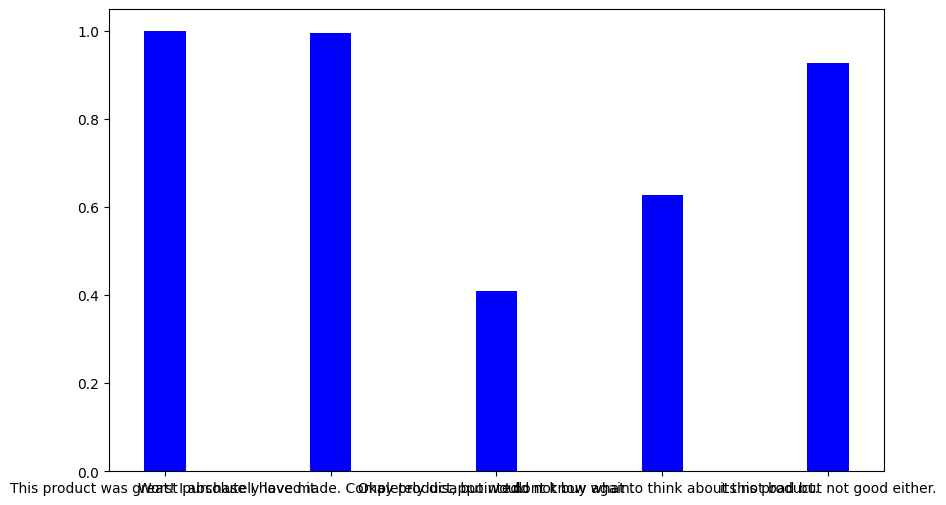

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_results is already defined with your data
# Display the DataFrame to ensure it's correctly loaded
df_results.head()

# Plotting
plt.figure(figsize=(10, 6))

models = ['distilbert', 'bart', 'roberta']
colors = ['blue', 'green', 'purple']
bar_width = 0.25
index = df_results.index

for i, model in enumerate(models):
    plt.bar(index, df_results[f'{model}_score'], width=bar_width, label=model, color=colors[i])
    index = index + bar_width

plt.xlabel('Statements')
plt.ylabel('Confidence Score')
plt.title('Model Predictions for Sentiment Analysis')
plt.xticks(rotation=15, ha='right', labels=df_results.index)
plt.legend()

plt.tight_layout()
plt.show()
